# Basic code

### Without CV and Without considering missing values

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X = df.iloc[:, 1:-1].values
y = df['label'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/10
10/10 [==============================] - 5s 159ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/10
10/10 [==============================] - 1s 63ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/10
10/10 [==============================] - 1s 62ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/10
10/10 [==============================] - 1s 63ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/10
10/10 [==============================] - 1s 59ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/10
10/10 [==============================] - 1s 58ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/10
10/10 [==============================] - 1s 59ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/10
10/10 [==============================] - 1s

# Garavidity

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-1].values  # Exclude the last column
X_gravidity = df['Gravidity'].values.reshape(-1, 1)
y = df['label'].values

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_gravidity, X_test_gravidity, y_train, y_test = train_test_split(
    X_time_series, X_gravidity, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_gravidity = StandardScaler()
X_train_gravidity = scaler_gravidity.fit_transform(X_train_gravidity)
X_test_gravidity = scaler_gravidity.transform(X_test_gravidity)

# Define the input layers
input_time_series = tf.keras.layers.Input(shape=(X_train_time_series.shape[1],))
input_gravidity = tf.keras.layers.Input(shape=(1,))

# Dense layer for time series data
dense_time_series = tf.keras.layers.Dense(128, activation='relu')(input_time_series)
dense_time_series = tf.keras.layers.Dropout(0.5)(dense_time_series)  # Dropout for regularization

# Dense layer for gravidity data
dense_gravidity = tf.keras.layers.Dense(32, activation='relu')(input_gravidity)

# Concatenate the outputs of the two branches
concatenated = tf.keras.layers.concatenate([dense_time_series, dense_gravidity])

# Additional dense layers for combined features
dense_combined = tf.keras.layers.Dense(64, activation='relu')(concatenated)
dense_combined = tf.keras.layers.Dropout(0.3)(dense_combined)  # Dropout for regularization
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense_combined)

# Create the model
model = tf.keras.models.Model(inputs=[input_time_series, input_gravidity], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    [X_train_time_series, X_train_gravidity], y_train,
    epochs=20, batch_size=64, validation_split=0.2
)

# Evaluate the model on training data
train_accuracy = model.evaluate([X_train_time_series, X_train_gravidity], y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate([X_test_time_series, X_test_gravidity], y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/20
5/5 [==============================] - 1s 64ms/step - loss: nan - accuracy: 0.9156 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss

### Minhee's suggestion for Dense layer and RNN

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-1].values  # Exclude the last column
X_gravidity = df['Gravidity'].values.reshape(-1, 1)
y = df['label'].values

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_gravidity, X_test_gravidity, y_train, y_test = train_test_split(
    X_time_series, X_gravidity, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_gravidity = StandardScaler()
X_train_gravidity = scaler_gravidity.fit_transform(X_train_gravidity)
X_test_gravidity = scaler_gravidity.transform(X_test_gravidity)

# Define the input layers
input_time_series = tf.keras.layers.Input(shape=(X_train_time_series.shape[1],))
input_gravidity = tf.keras.layers.Input(shape=(1,))

# Reshape the time series input for LSTM
reshaped_time_series = tf.keras.layers.Reshape((X_train_time_series.shape[1], 1))(input_time_series)

# LSTM layer for time series data
lstm_time_series = tf.keras.layers.LSTM(128)(reshaped_time_series)

# Concatenate the LSTM outputs with gravidity data
concatenated = tf.keras.layers.concatenate([lstm_time_series, input_gravidity])

# Additional dense layers for combined features
dense_combined = tf.keras.layers.Dense(64, activation='relu')(concatenated)
dense_combined = tf.keras.layers.Dropout(0.3)(dense_combined)  # Dropout for regularization
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense_combined)

# Create the model
model = tf.keras.models.Model(inputs=[input_time_series, input_gravidity], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    [X_train_time_series, X_train_gravidity], y_train,
    epochs=20, batch_size=64, validation_split=0.2
)

# Evaluate the model on training data
train_accuracy = model.evaluate([X_train_time_series, X_train_gravidity], y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate([X_test_time_series, X_test_gravidity], y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/20
5/5 [==============================] - 3s 257ms/step - loss: nan - accuracy: 0.9123 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/20
5/5 [==============================] - 1s 105ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/20
5/5 [==============================] - 1s 107ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/20
5/5 [==============================] - 0s 100ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/20
5/5 [==============================] - 0s 99ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/20
5/5 [==============================] - 0s 97ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/20
5/5 [==============================] - 0s 99ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/20
5/5 [==============================] - 0s 99ms/step - 

## All features

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns: "Age", "Gravidity", and "label"
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for RNN input (samples, time steps, features)
X_train_time_series = np.reshape(X_train_time_series, (X_train_time_series.shape[0], X_train_time_series.shape[1], 1))
X_test_time_series = np.reshape(X_test_time_series, (X_test_time_series.shape[0], X_test_time_series.shape[1], 1))

# Define the input layers
input_time_series = tf.keras.layers.Input(shape=(X_train_time_series.shape[1], 1))
input_additional = tf.keras.layers.Input(shape=(X_train_additional.shape[1],))

# LSTM layers for time series data
lstm1 = tf.keras.layers.LSTM(64, return_sequences=True)(input_time_series)
lstm2 = tf.keras.layers.LSTM(64)(lstm1)
flatten1 = tf.keras.layers.Flatten()(lstm2)

# Concatenate features before passing to Dense layers
concatenated_features = tf.keras.layers.concatenate([flatten1, input_additional])

# Dense layers for combined features
dense_combined = tf.keras.layers.Dense(128, activation='relu')(concatenated_features)
dropout_combined = tf.keras.layers.Dropout(0.5)(dense_combined)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_combined)

# Create the model
model = tf.keras.models.Model(inputs=[input_time_series, input_additional], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_train_time_series, X_train_additional], y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
train_accuracy = model.evaluate([X_train_time_series, X_train_additional], y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate([X_test_time_series, X_test_additional], y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/15
10/10 [==============================] - 5s 159ms/step - loss: nan - accuracy: 0.9221 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/15
10/10 [==============================] - 1s 61ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/15
10/10 [==============================] - 1s 59ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/15
10/10 [==============================] - 1s 59ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/15
10/10 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/15
10/10 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/15
10/10 [==============================] - 1s 57ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/15
10/10 [==============================] - 1s

# II.stage

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-2].values  # Exclude the first (instance identifier) and the last two columns (laber and other non-time series)
X_ii_stage = df['II.stage'].values.reshape(-1, 1)  # # Non-time series feature named "II.stage"
y = df['label'].values

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_ii_stage, X_test_ii_stage, y_train, y_test = train_test_split(
    X_time_series, X_ii_stage, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_ii_stage = StandardScaler()
X_train_ii_stage = scaler_ii_stage.fit_transform(X_train_ii_stage)
X_test_ii_stage = scaler_ii_stage.transform(X_test_ii_stage)

# Define the input layers
input_time_series = tf.keras.layers.Input(shape=(X_train_time_series.shape[1], 1))  # Adjusted input shape for time series
input_ii_stage = tf.keras.layers.Input(shape=(1,))

# Dense layer for time series data
dense_time_series = tf.keras.layers.Dense(64, activation='relu')(input_time_series)
lstm1 = tf.keras.layers.LSTM(64, return_sequences=True)(dense_time_series)
lstm2 = tf.keras.layers.LSTM(64)(lstm1)
flatten1 = tf.keras.layers.Flatten()(lstm2)

# Dense layer for ii_stage data
dense_ii_stage = tf.keras.layers.Dense(32, activation='relu')(input_ii_stage)

# Concatenate the outputs of the LSTM layer and dense ii_stage layer
concatenated = tf.keras.layers.concatenate([flatten1, dense_ii_stage])

# Additional dense layers for combined features
dense_combined = tf.keras.layers.Dense(64, activation='relu')(concatenated)
dense_combined = tf.keras.layers.Dropout(0.3)(dense_combined)  # Dropout for regularization
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense_combined)


# Create the model
model = tf.keras.models.Model(inputs=[input_time_series, input_ii_stage], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    [X_train_time_series, X_train_ii_stage], y_train,
    epochs=20, batch_size=64, validation_split=0.2
)

# Evaluate the model on training data
train_accuracy = model.evaluate([X_train_time_series, X_train_ii_stage], y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate([X_test_time_series, X_test_ii_stage], y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")



Epoch 1/20
5/5 [==============================] - 6s 342ms/step - loss: nan - accuracy: 0.9188 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/20
5/5 [==============================] - 1s 135ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/20
5/5 [==============================] - 1s 139ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/20
5/5 [==============================] - 1s 150ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/20
5/5 [==============================] - 1s 147ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/20
5/5 [==============================] - 1s 145ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/20
5/5 [==============================] - 1s 181ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/20
5/5 [==============================] - 1s 154ms/ste

# Age

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-2].values  # Exclude the last two columns: "Age" and "label"
X_age = df['Age'].values.reshape(-1, 1)
X = np.concatenate((X_time_series, X_age), axis=1)
y = df['label'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model with an additional dense layer for the "Age" feature
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Flatten(),  # Flatten the output from the LSTM layers
    tf.keras.layers.Dense(32, activation='relu'),  # Additional dense layer for Age
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/10
10/10 [==============================] - 6s 181ms/step - loss: nan - accuracy: 0.9188 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/10
10/10 [==============================] - 1s 82ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/10
10/10 [==============================] - 1s 69ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/10
10/10 [==============================] - 1s 61ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/10
10/10 [==============================] - 1s 65ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/10
10/10 [==============================] - 1s 63ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/10
10/10 [==============================] - 1s 64ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/10
10/10 [==============================] - 1s

In the following code, I've made the following changes:

    - Increased the number of neurons in the additional dense layer for the "Age" feature to 64.
    - Added a dropout layer after the additional dense layer for regularization.
    - Increased the number of epochs to 15.

These modifications are intended to enhance the model's ability to capture patterns from the "Age" feature.**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-2].values  # Exclude the last two columns: "Age" and "label"
X_age = df['Age'].values.reshape(-1, 1)
X = np.concatenate((X_time_series, X_age), axis=1)
y = df['label'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model with an additional dense layer for the "Age" feature
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Flatten(),  # Flatten the output from the LSTM layers
    tf.keras.layers.Dense(64, activation='relu'),  # Additional dense layer for Age
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/15
10/10 [==============================] - 5s 156ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/15
10/10 [==============================] - 1s 70ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/15
10/10 [==============================] - 1s 69ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/15
10/10 [==============================] - 1s 67ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/15
10/10 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/15
10/10 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/15
10/10 [==============================] - 1s 63ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/15
10/10 [==============================] - 1s

**So, it seems Age also doesn't matter!**

# Gravidity and Age

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-2].values  # Exclude the last two columns: "Age", "Gravidity", and "label"
X_age = df['Age'].values.reshape(-1, 1)
X_gravidity = df['Gravidity'].values.reshape(-1, 1)

# Concatenate Age and Gravidity
X_additional_features = np.concatenate((X_age, X_gravidity), axis=1)
y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for RNN input (samples, time steps, features)
X_train_time_series = np.reshape(X_train_time_series, (X_train_time_series.shape[0], X_train_time_series.shape[1], 1))
X_test_time_series = np.reshape(X_test_time_series, (X_test_time_series.shape[0], X_test_time_series.shape[1], 1))

# Define the input layers
input_time_series = tf.keras.layers.Input(shape=(X_train_time_series.shape[1], 1))
input_additional = tf.keras.layers.Input(shape=(X_train_additional.shape[1],))

# LSTM layers for time series data
lstm1 = tf.keras.layers.LSTM(64, return_sequences=True)(input_time_series)
lstm2 = tf.keras.layers.LSTM(64)(lstm1)
flatten1 = tf.keras.layers.Flatten()(lstm2)

# Dense layers for additional features
dense1 = tf.keras.layers.Dense(128, activation='relu')(input_additional)
dropout1 = tf.keras.layers.Dropout(0.7)(dense1)

# Concatenate the outputs of the two branches
concatenated = tf.keras.layers.concatenate([flatten1, dropout1])

# Additional dense layers for combined features
dense_combined = tf.keras.layers.Dense(128, activation='relu')(concatenated)
dropout_combined = tf.keras.layers.Dropout(0.5)(dense_combined)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_combined)

# Create the model
model = tf.keras.models.Model(inputs=[input_time_series, input_additional], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_train_time_series, X_train_additional], y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
train_accuracy = model.evaluate([X_train_time_series, X_train_additional], y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate([X_test_time_series, X_test_additional], y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/15
10/10 [==============================] - 6s 194ms/step - loss: nan - accuracy: 0.9221 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/15
10/10 [==============================] - 1s 74ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/15
10/10 [==============================] - 1s 73ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/15
10/10 [==============================] - 1s 74ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/15
10/10 [==============================] - 1s 73ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/15
10/10 [==============================] - 1s 73ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/15
10/10 [==============================] - 1s 73ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/15
10/10 [==============================] - 1s

**Comtacanating Age and Gravidity before passing them through the dense layers**

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-3].values  # Exclude the last three columns: "Age", "Gravidity", and "label"
X_age = df['Age'].values.reshape(-1, 1)
X_gravidity = df['Gravidity'].values.reshape(-1, 1)

# Concatenate Age and Gravidity
X_additional_features = np.concatenate((X_age, X_gravidity), axis=1)

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for RNN input (samples, time steps, features)
X_train_time_series = np.reshape(X_train_time_series, (X_train_time_series.shape[0], X_train_time_series.shape[1], 1))
X_test_time_series = np.reshape(X_test_time_series, (X_test_time_series.shape[0], X_test_time_series.shape[1], 1))

# Define the input layers
input_time_series = tf.keras.layers.Input(shape=(X_train_time_series.shape[1], 1))
input_additional = tf.keras.layers.Input(shape=(X_train_additional.shape[1],))

# LSTM layers for time series data
lstm1 = tf.keras.layers.LSTM(64, return_sequences=True)(input_time_series)
lstm2 = tf.keras.layers.LSTM(64)(lstm1)
flatten1 = tf.keras.layers.Flatten()(lstm2)

# Concatenate Age and Gravidity before passing to Dense layers
concatenated_features = tf.keras.layers.concatenate([flatten1, input_additional])

# Dense layers for combined features
dense_combined = tf.keras.layers.Dense(128, activation='relu')(concatenated_features)
dropout_combined = tf.keras.layers.Dropout(0.5)(dense_combined)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_combined)

# Create the model
model = tf.keras.models.Model(inputs=[input_time_series, input_additional], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_train_time_series, X_train_additional], y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
train_accuracy = model.evaluate([X_train_time_series, X_train_additional], y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate([X_test_time_series, X_test_additional], y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/15
10/10 [==============================] - 6s 195ms/step - loss: nan - accuracy: 0.9253 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/15
10/10 [==============================] - 1s 88ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/15
10/10 [==============================] - 1s 69ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/15
10/10 [==============================] - 1s 69ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/15
10/10 [==============================] - 1s 64ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/15
10/10 [==============================] - 1s 61ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/15
10/10 [==============================] - 1s 58ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/15
10/10 [==============================] - 1s

# Diabetes

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-2].values  # Exclude the last two columns: "Diabetes" and "label"
X_diabetes = df['Diabetes'].values.reshape(-1, 1)
X = np.concatenate((X_time_series, X_diabetes), axis=1)
y = df['label'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model with an additional dense layer for the "Diabetes" feature
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Flatten(),  # Flatten the output from the LSTM layers
    tf.keras.layers.Dense(32, activation='relu'),  # Additional dense layer for Diabetes
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


# All features

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns: "Age", "Gravidity", and "label"
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for RNN input (samples, time steps, features)
X_train_time_series = np.reshape(X_train_time_series, (X_train_time_series.shape[0], X_train_time_series.shape[1], 1))
X_test_time_series = np.reshape(X_test_time_series, (X_test_time_series.shape[0], X_test_time_series.shape[1], 1))

# Define the input layers
input_time_series = tf.keras.layers.Input(shape=(X_train_time_series.shape[1], 1))
input_additional = tf.keras.layers.Input(shape=(X_train_additional.shape[1],))

# LSTM layers for time series data
lstm1 = tf.keras.layers.LSTM(64, return_sequences=True)(input_time_series)
lstm2 = tf.keras.layers.LSTM(64)(lstm1)
flatten1 = tf.keras.layers.Flatten()(lstm2)

# Concatenate features before passing to Dense layers
concatenated_features = tf.keras.layers.concatenate([flatten1, input_additional])

# Dense layers for combined features
dense_combined = tf.keras.layers.Dense(128, activation='relu')(concatenated_features)
dropout_combined = tf.keras.layers.Dropout(0.5)(dense_combined)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_combined)

# Create the model
model = tf.keras.models.Model(inputs=[input_time_series, input_additional], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_train_time_series, X_train_additional], y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
train_accuracy = model.evaluate([X_train_time_series, X_train_additional], y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate([X_test_time_series, X_test_additional], y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/15
10/10 [==============================] - 5s 156ms/step - loss: nan - accuracy: 0.9156 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/15
10/10 [==============================] - 1s 68ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/15
10/10 [==============================] - 1s 67ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/15
10/10 [==============================] - 1s 64ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/15
10/10 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/15
10/10 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/15
10/10 [==============================] - 1s 59ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/15
10/10 [==============================] - 1s

**No difference in results**

#### Final RNN_LSTM (With Confusion Matrix)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 197ms/step - accuracy: 0.9303 - loss: 0.6914 - val_accuracy: 0.9359 - val_loss: 0.6887
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9326 - loss: 0.6878 - val_accuracy: 0.9359 - val_loss: 0.6843
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9281 - loss: 0.6836 - val_accuracy: 0.9359 - val_loss: 0.6799
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.9255 - loss: 0.6796 - val_accuracy: 0.9359 - val_loss: 0.6756
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9170 - loss: 0.6758 - val_accuracy: 0.9359 - val_loss: 0.6713
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9472 - loss: 0.6703 - val_accuracy: 0.9359 - val_loss: 0.6669
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9406 - loss: 0.6664 - val_accuracy: 0.9359 - val_loss: 0.6627
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9452 - loss: 0.6620 - val_accuracy: 0.9359 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


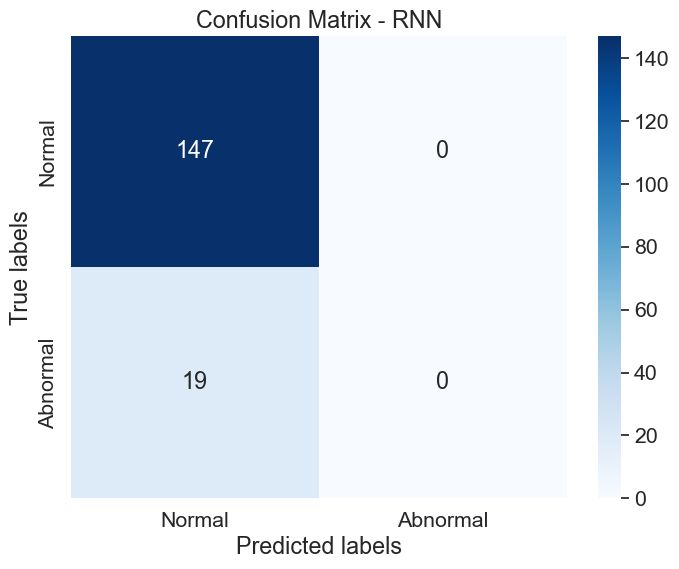

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\FHRT\PROJECT\Data_Results\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns: "Age", "Gravidity", and "label"
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for RNN input (samples, time steps, features)
X_train_time_series = np.reshape(X_train_time_series, (X_train_time_series.shape[0], X_train_time_series.shape[1], 1))
X_test_time_series = np.reshape(X_test_time_series, (X_test_time_series.shape[0], X_test_time_series.shape[1], 1))

# Define the input layers
input_time_series = tf.keras.layers.Input(shape=(X_train_time_series.shape[1], 1))
input_additional = tf.keras.layers.Input(shape=(X_train_additional.shape[1],))

# LSTM layers for time series data
lstm1 = tf.keras.layers.LSTM(64, return_sequences=True)(input_time_series)
lstm2 = tf.keras.layers.LSTM(64)(lstm1)
flatten1 = tf.keras.layers.Flatten()(lstm2)

# Concatenate features before passing to Dense layers
concatenated_features = tf.keras.layers.concatenate([flatten1, input_additional])

# Dense layers for combined features
dense_combined = tf.keras.layers.Dense(128, activation='relu')(concatenated_features)
dropout_combined = tf.keras.layers.Dropout(0.5)(dense_combined)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_combined)

# Create the model
model = tf.keras.models.Model(inputs=[input_time_series, input_additional], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([X_train_time_series, X_train_additional], y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate([X_test_time_series, X_test_additional], y_test, verbose=0)

print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")

# Make predictions on test data
test_probabilities = model.predict([X_test_time_series, X_test_additional])
test_predictions = (test_probabilities > 0.5).astype(int)

# Compute confusion matrix for test data
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print metrics
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-score: {f1:.2f}%")
print(f"Specificity: {specificity:.2f}%")

# Create heatmap of confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - RNN')

# Show plot
plt.show()


# All features (Vanilla architecture)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns: "Age", "Gravidity", and other features
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values
X = np.concatenate((X_time_series, X_additional_features), axis=1)
y = df['label'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Improved Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on training data
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/50
10/10 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Accuracy on training data: 93.01%
Accuracy on test data: 88.55%


# All features (CNN architecture)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns: "Age", "Gravidity", and other features
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values
X = np.concatenate((X_time_series, X_additional_features), axis=1)
y = df['label'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN input (samples, time steps, features, channels)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on training data
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/50
10/10 [==============================] - 1s 30ms/step - loss: nan - accuracy: 0.9221 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Accuracy on training data: 93.01%
Accuracy on test data: 88.55%


#### With Confusion Matrix

Epoch 1/50


C:\ProgramData\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8645 - loss: 0.6763 - val_accuracy: 0.9359 - val_loss: 0.6457
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9382 - loss: 0.6319 - val_accuracy: 0.9359 - val_loss: 0.5820
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9310 - loss: 0.5679 - val_accuracy: 0.9359 - val_loss: 0.4962
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9359 - loss: 0.4810 - val_accuracy: 0.9359 - val_loss: 0.3960
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9399 - loss: 0.3895 - val_accuracy: 0.9359 - val_loss: 0.3036
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9217 - loss: 0.3294 - val_accuracy: 0.9359 - val_loss: 0.2432
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9201 - loss: 0.2931 - val_accuracy: 0.9359 - val_loss: 0.2161
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9307 - loss: 0.2728 - val_accuracy: 0.9359 - val_loss: 0.

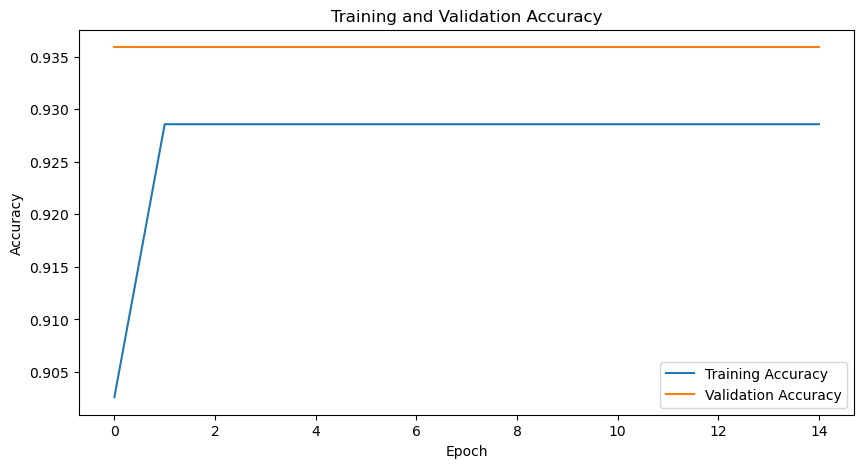

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


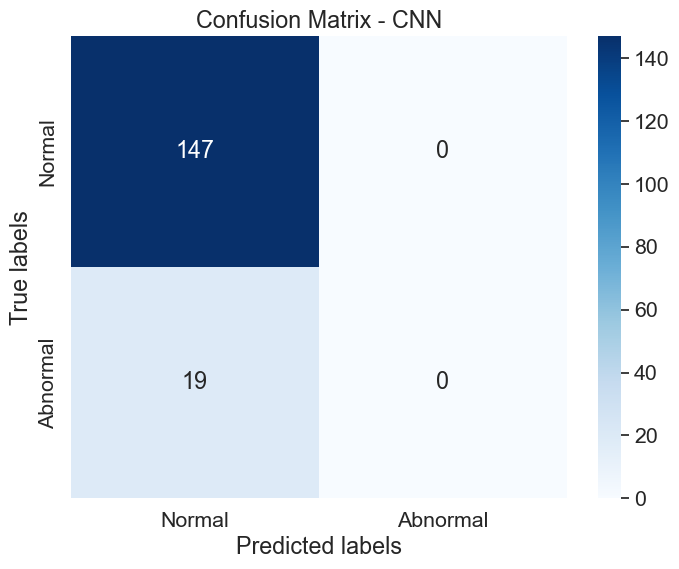

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns: "Age", "Gravidity", and other features
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values
X = np.concatenate((X_time_series, X_additional_features), axis=1)
y = df['label'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN input (samples, time steps, features, channels)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Make predictions on test data
test_probabilities = model.predict(X_test)
test_predictions = (test_probabilities > 0.5).astype(int)

# Compute confusion matrix for test data
conf_matrix = confusion_matrix(y_test, test_predictions)

# Define labels for the matrix
labels = ['Normal', 'Abnormal']

# Create heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - CNN')

# Show plot
plt.show()


Since we are consistently getting similar accuracy across different architectures (LSTM, Vanilla, CNN), there are a few potential reasons for this:

    - Data Characteristics: The features in your dataset or the nature of the problem might not be effectively captured by the models you've tried. It's possible that the predictive power of the additional features or the temporal dependencies in the time series data is limited.

    - Model Complexity: The complexity of the models you've tried might not be necessary for the given problem. Sometimes, simpler models can perform just as well or better than more complex ones, especially if the dataset is not very large.

    - Hyperparameter Tuning: The choice of hyperparameters (learning rate, dropout rate, etc.) and the number of epochs during training can significantly impact the performance. You may need to experiment with different hyperparameter values and tuning strategies.

    - Data Preprocessing: The preprocessing steps, such as standardization and reshaping, could be affecting the model's ability to learn. Ensure that the preprocessing steps are appropriate for the chosen architecture.

To address these issues, we considered all the following:

    - Experiment with Hyperparameters: Adjust the learning rate, try different dropout rates, and experiment with other hyperparameters to find the optimal configuration.

    - Feature Importance: Assess the importance of each feature using techniques like feature importance plots or correlation analysis. It's possible that some features contribute more to the prediction task than others.

    - Model Complexity: If simpler models are performing similarly, you might stick with a simpler architecture. Try a smaller number of layers or units in the layers.
    
Here's an updated code snippet with a simpler architecture that we tried and got the same results:

# Choosing a simple model

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values
X = np.concatenate((X_time_series, X_additional_features), axis=1)
y = df['label'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simpler model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]

# Evaluate the model on test data
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Epoch 1/20
10/10 [==============================] - 1s 41ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.9286 - val_loss: nan - val_accuracy: 0.9359
Epoch 8/20
10/10 [==============================] - 0s 5ms/st

# Analysis

Accuracy on test data: 96.39%


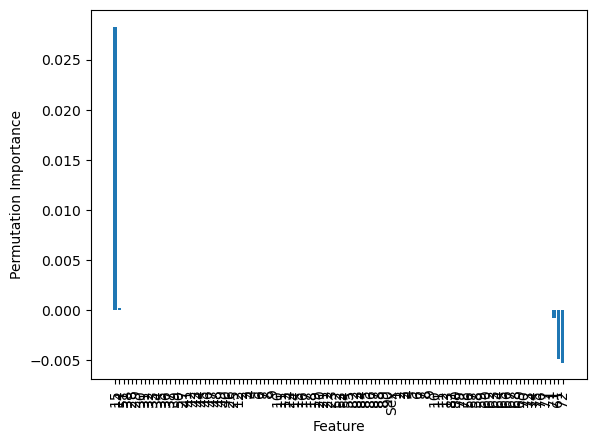

Correlation with the target variable:
 label           1.000000
Patient         0.835611
NoProgress      0.534333
60              0.155771
Presentation    0.134879
                  ...   
73             -0.515287
62             -0.523126
61             -0.542309
72             -0.551155
71             -0.564715
Name: label, Length: 107, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values
X = np.concatenate((X_time_series, X_additional_features), axis=1)
y = df['label'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model (you can use your model of choice)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on test data
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")

# Permutation Importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Plot Permutation Importance
num_features = X_test.shape[1]
plt.bar(range(num_features), perm_importance.importances_mean[sorted_idx])
plt.xticks(range(num_features), df.columns[1:-15][sorted_idx % (num_features - 15)], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.show()

# Correlation Analysis
correlation_matrix = df.corr()
target_correlation = correlation_matrix['label'].sort_values(ascending=False)
print("Correlation with the target variable:\n", target_correlation)


# Testing Conventional ML models (Missing values and CV are considered)

## 1. Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns: "Age", "Gravidity", and "label"
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for Logistic Regression input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Create and train Logistic Regression model with L2 regularization
model = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = model.predict(X_train)

# Make predictions on test data
test_predictions = model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Accuracy on training data: 99.74%
Accuracy on test data: 95.78%


#### With confusion Matrix

Accuracy on training data: 99.74%
Accuracy on test data: 95.78%


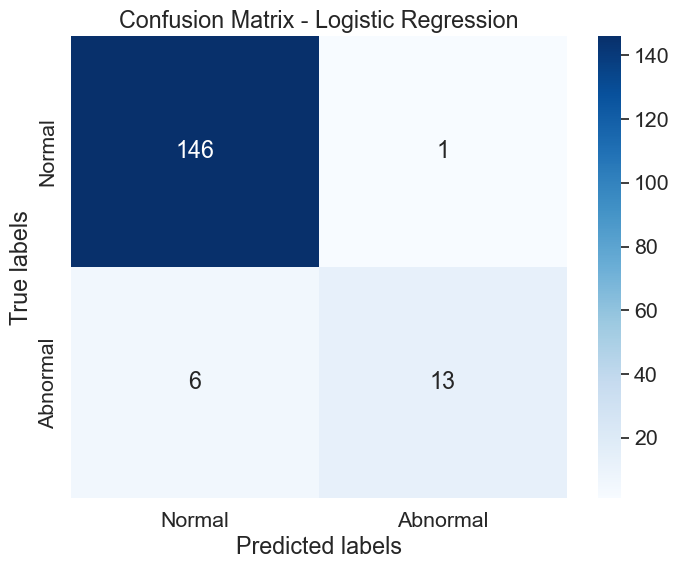

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns: "Age", "Gravidity", and "label"
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for Logistic Regression input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Create and train Logistic Regression model with L2 regularization
model = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = model.predict(X_train)

# Make predictions on test data
test_predictions = model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")

# Compute confusion matrix for test data
conf_matrix = confusion_matrix(y_test, test_predictions)

# Define labels for the matrix
labels = ['Normal', 'Abnormal']

# Create heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')

# Show plot
plt.show()


## 2. Random Forrest

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for Random Forest input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Train a Random Forest model (you can use your model of choice)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = model.predict(X_train)

# Make predictions on test data
test_predictions = model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Accuracy on training data: 100.00%
Accuracy on test data: 96.39%


#### RF with Confusion Matrix

Accuracy on training data: 100.00%
Accuracy on test data: 96.39%


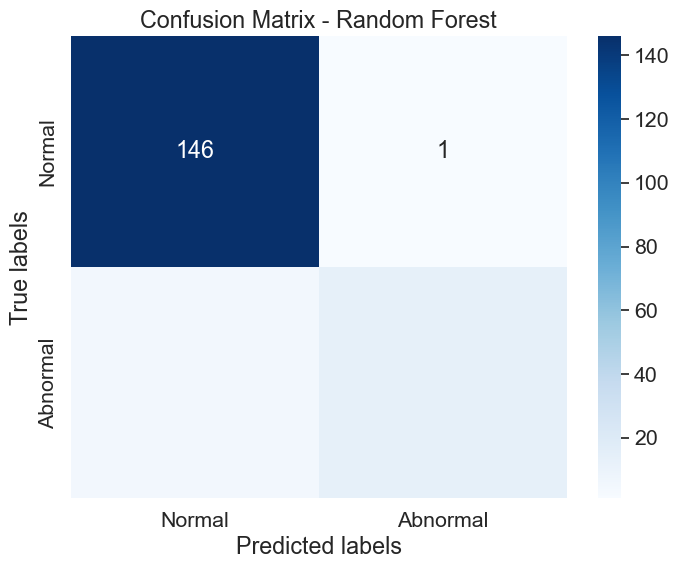

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\FHRT\PROJECT\Data_Results\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"

df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for Random Forest input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Train a Random Forest model (you can use your model of choice)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = model.predict(X_train)

# Make predictions on test data
test_predictions = model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")

# Compute confusion matrix for test data
conf_matrix = confusion_matrix(y_test, test_predictions)

# Define labels for the matrix
labels = ['Normal', 'Abnormal']

# Create heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')

# Show plot
plt.show()


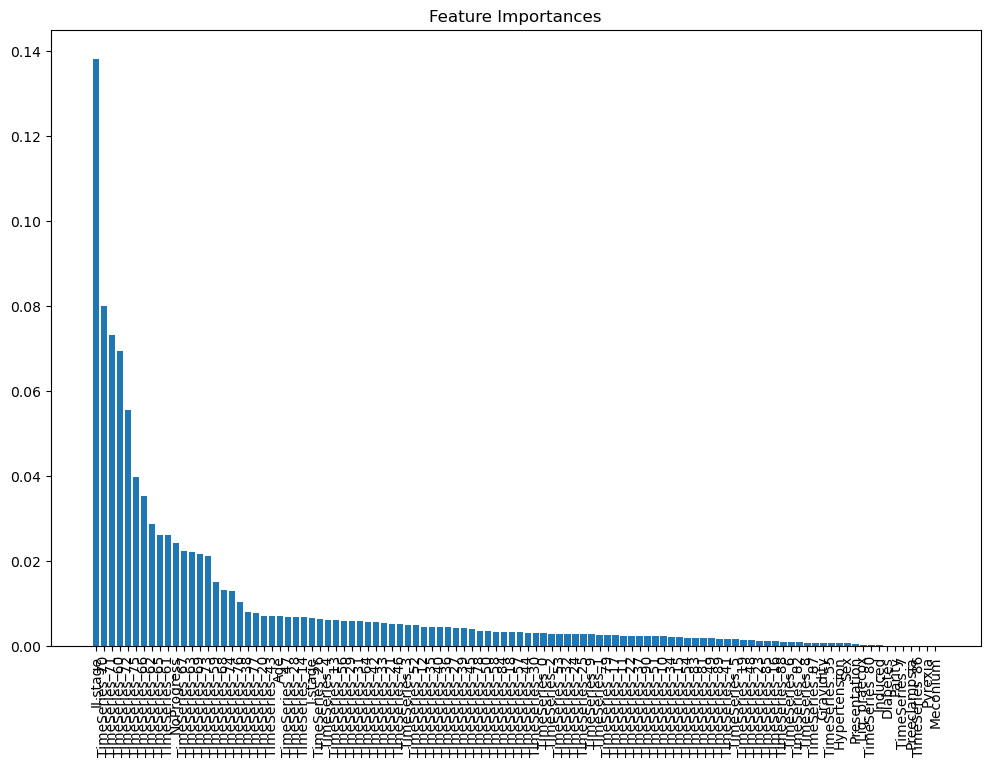

Top 10 Most Important Features:
II.stage: 0.1380
TimeSeries_70: 0.0799
TimeSeries_71: 0.0731
TimeSeries_60: 0.0693
TimeSeries_72: 0.0555
TimeSeries_75: 0.0398
TimeSeries_66: 0.0352
TimeSeries_62: 0.0286
TimeSeries_65: 0.0262
TimeSeries_61: 0.0261


In [2]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get feature names
feature_names = [f"TimeSeries_{i}" for i in range(X_train_time_series.shape[1])] + \
                ['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                 'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                 'NoProgress', 'II.stage']

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.title('Feature Importances')
plt.show()

# List the most important features
print("Top 10 Most Important Features:")
for i in range(10):
    print(f"{feature_names[indices[i]]}: {feature_importances[indices[i]]:.4f}")


## 3. SVM (with CV and Regularization)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for SVM input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Hyperparameter tuning using GridSearchCV with regularization
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid.best_params_

# Train the SVM model with the best parameters and regularization
svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], class_weight='balanced')
svm_model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = svm_model.predict(X_train)

# Make predictions on test data
test_predictions = svm_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.922 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.922 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

#### With Confusion Matrix

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.922 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.922 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

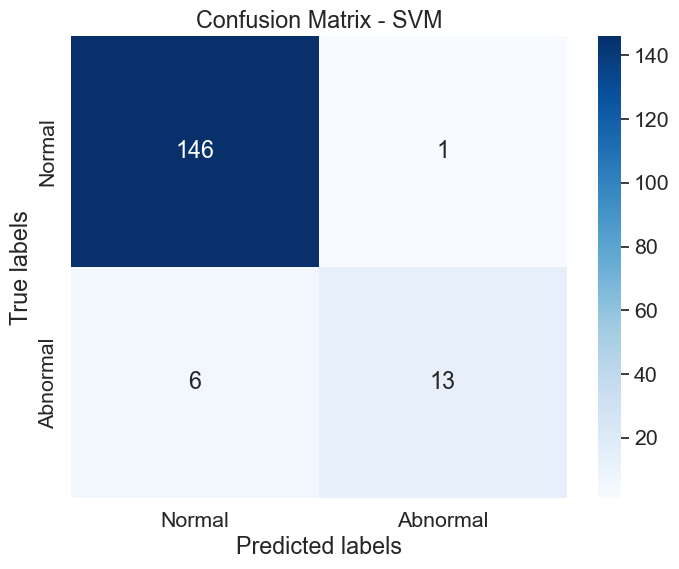

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for SVM input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Hyperparameter tuning using GridSearchCV with regularization
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid.best_params_

# Train the SVM model with the best parameters and regularization
svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], class_weight='balanced')
svm_model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = svm_model.predict(X_train)

# Make predictions on test data
test_predictions = svm_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")

# Compute confusion matrix for test data
conf_matrix = confusion_matrix(y_test, test_predictions)

# Define labels for the matrix
labels = ['Normal', 'Abnormal']

# Create heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM')

# Show plot
plt.show()


### PCA for feature analysis

Features based on average importance:
FHR_81, I.stage, FHR_15, FHR_21, FHR_38, FHR_41, FHR_84, FHR_82, Pyrexia, FHR_46, FHR_55, FHR_9, FHR_12, FHR_3, FHR_52, FHR_35, FHR_30, Liq. praecox, FHR_22, FHR_86, FHR_89, FHR_62, FHR_18, FHR_87, FHR_57, FHR_16, Hypertension, FHR_51, FHR_36, FHR_0, FHR_34, FHR_70, FHR_19, FHR_76, FHR_11, FHR_20, FHR_28, FHR_43, FHR_8, Sex, FHR_33, FHR_80, FHR_37, Presentation, FHR_71, Parity, FHR_26, FHR_13, FHR_5, FHR_47, FHR_90, FHR_64, FHR_61, FHR_74, FHR_85, FHR_50, FHR_7, Gravidity, FHR_14, Age, FHR_73, FHR_25, FHR_4, FHR_40, FHR_63, FHR_66, FHR_67, II.stage, FHR_69, Preeclampsia, FHR_17, FHR_75, Induced, FHR_59, FHR_60, FHR_29, FHR_42, FHR_78, FHR_88, FHR_65, FHR_44, FHR_56, FHR_6, FHR_27, FHR_45, FHR_83, FHR_39, Meconium, FHR_54, FHR_31, FHR_1, NoProgress, FHR_79, FHR_77, FHR_23, FHR_32, FHR_49, FHR_53, FHR_72, FHR_10, FHR_68, FHR_24, FHR_58, Diabetes, FHR_48, FHR_2


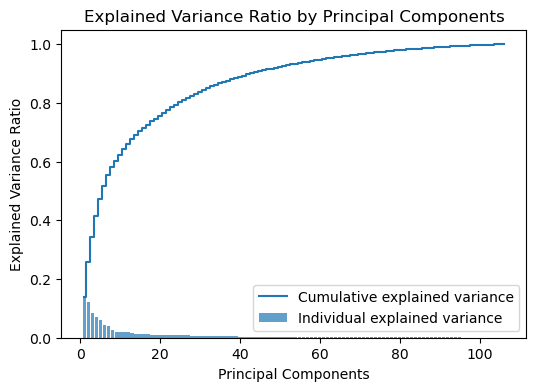

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

# Combine features
X = np.concatenate([X_time_series, X_additional_features], axis=1)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plot explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend()

# Save the figure as a PDF
plt.savefig('explained_variance_ratio_plot.pdf')

# Calculate average importance
average_importance = np.abs(np.mean(pca.components_, axis=0))

# List the features based on average importance
feature_names = np.array([f"FHR_{i}" for i in range(X_time_series.shape[1])] +
                         ['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                          'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                          'NoProgress', 'II.stage'])

# List the features based on average importance in descending order
sorted_features = feature_names[np.argsort(average_importance)[::-1]]

print("Features based on average importance:")
print(', '.join(sorted_features))


### Naive Bayes (CV+ Regularization)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for Naive Bayes input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = nb_model.predict(X_train)

# Make predictions on test data
test_predictions = nb_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Accuracy on training data: 98.45%
Accuracy on test data: 95.18%


#### Naive Bayes (Just with FHR times series data)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_time_series, y, test_size=0.3, random_state=42)

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = nb_model.predict(X_train)

# Make predictions on test data
test_predictions = nb_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Accuracy on training data: 98.19%
Accuracy on test data: 95.78%


# KNN

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for k-NN input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Train the k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = knn_model.predict(X_train)

# Make predictions on test data
test_predictions = knn_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Accuracy on training data: 96.89%
Accuracy on test data: 94.58%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Decision Tree

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for Decision Tree input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Hyperparameter tuning using GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid.best_params_

# Train the Decision Tree model with the best parameters
dt_model = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'],
                                  min_samples_split=best_params['min_samples_split'], class_weight='balanced')
dt_model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = dt_model.predict(X_train)

# Make predictions on test data
test_predictions = dt_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.962 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.987 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.987 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.987 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=0.987 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.974 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.987 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=0.974 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples

[CV 4/5] END criterion=entropy, max_depth=None, min_samples_split=2;, score=0.987 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, min_samples_split=2;, score=0.948 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, min_samples_split=5;, score=0.974 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, min_samples_split=5;, score=0.987 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, min_samples_split=5;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, min_samples_split=5;, score=0.987 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, min_samples_split=5;, score=0.948 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, min_samples_split=10;, score=0.962 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, min_samples_split=10;, score=0.987 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, min_samples_split=10;, score=0.987 total 

[CV 3/5] END criterion=entropy, max_depth=50, min_samples_split=10;, score=0.987 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=50, min_samples_split=10;, score=0.987 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=50, min_samples_split=10;, score=0.948 total time=   0.0s
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Accuracy on training data: 99.74%
Accuracy on test data: 95.78%


# Ensemble Model

Ensemble model based on Hard voting

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for SVM input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Hyperparameter tuning using GridSearchCV with regularization for SVM
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=3)
grid_svm.fit(X_train, y_train)

# Get the best parameters from the grid search for SVM
best_params_svm = grid_svm.best_params_

# Train the SVM model with the best parameters and regularization
svm_model = SVC(C=best_params_svm['C'], gamma=best_params_svm['gamma'], kernel=best_params_svm['kernel'], class_weight='balanced')

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit=True, verbose=3)
grid_rf.fit(X_train, y_train)

# Get the best parameters from the grid search for Random Forest
best_params_rf = grid_rf.best_params_

# Train the Random Forest model with the best parameters
rf_model = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                  max_depth=best_params_rf['max_depth'],
                                  min_samples_split=best_params_rf['min_samples_split'], random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression()

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('rf', rf_model),
    ('lr', lr_model)
], voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = ensemble_model.predict(X_train)

# Make predictions on test data
test_predictions = ensemble_model.predict(X_test)

# Evaluate the ensemble model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the ensemble model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.922 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.922 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

[CV 3/5] END max_depth=None, min_samples_split=5, n_estimators=50;, score=0.987 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_split=5, n_estimators=50;, score=0.974 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_split=5, n_estimators=50;, score=0.961 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_split=5, n_estimators=100;, score=0.987 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_split=5, n_estimators=100;, score=0.987 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_split=5, n_estimators=100;, score=0.974 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_split=5, n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_split=5, n_estimators=200;, score=0.974 total time=   0.2s
[CV

[CV 2/5] END max_depth=20, min_samples_split=2, n_estimators=200;, score=0.974 total time=   0.2s
[CV 3/5] END max_depth=20, min_samples_split=2, n_estimators=200;, score=0.987 total time=   0.2s
[CV 4/5] END max_depth=20, min_samples_split=2, n_estimators=200;, score=0.974 total time=   0.2s
[CV 5/5] END max_depth=20, min_samples_split=2, n_estimators=200;, score=0.961 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_split=5, n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_split=5, n_estimators=50;, score=0.974 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_split=5, n_estimators=50;, score=0.987 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_split=5, n_estimators=50;, score=0.974 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_split=5, n_estimators=50;, score=0.974 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END max_depth=20

Ensemble model based on Soft voting

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Create individual models
logistic_model = LogisticRegression(random_state=42)
svm_model = SVC(C=1, gamma=0.1, kernel='rbf', class_weight='balanced', probability=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('svm', svm_model),
        ('random_forest', rf_model)
    ],
    voting='soft'  # Use 'soft' voting for probability-based classification
)

# Train the ensemble model
ensemble_model.fit(
    np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1),
    y_train
)

# Make predictions on test data
test_predictions = ensemble_model.predict(
    np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)
)

# Evaluate the ensemble model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Accuracy on training data: 100.00%
Accuracy on test data: 96.39%


This code creates a stacking ensemble model with Logistic Regression as the meta-model. You can experiment with different base models and meta-models based on your specific requirements.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Create base models
base_models = [
    ('logistic', LogisticRegression(random_state=42)),
    ('svm', SVC(C=1, gamma=0.1, kernel='rbf', class_weight='balanced', probability=True, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Create stacking ensemble model with Logistic Regression as the meta-model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(random_state=42)
)

# Train the stacking ensemble model
stacking_model.fit(
    np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1),
    y_train
)

# Make predictions on training data
train_predictions = stacking_model.predict(
    np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
)

# Make predictions on test data
test_predictions = stacking_model.predict(
    np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)
)

# Evaluate the stacking ensemble model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the stacking ensemble model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Accuracy on training data: 100.00%
Accuracy on test data: 96.39%


Simple XBG model

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Reshape data for stacking input (samples, features)
X_train = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Define base models
base_models = [
    ('logistic', LogisticRegression(max_iter=1000)),
    ('svm', SVC(C=1, kernel='linear', probability=True)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier(use_label_encoder=False))

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on training data
train_predictions = stacking_model.predict(X_train)

# Make predictions on test data
test_predictions = stacking_model.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on training data: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Accuracy on training data: 100.00%
Accuracy on test data: 95.78%


## XGBoost (based LR, SVM, RF) - Best performance

Another advanced ensemble method is the Gradient Boosting. One popular implementation is the XGBoost (Extreme Gradient Boosting).


We used GridSearchCV (a type of CV) to perform hyperparameter tuning for the XGBoost model. Hyperparameter tuning on learning_rate, n_estimators, max_depth, subsample, and colsample_bytree.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Create XGBoost ensemble model
xgb_model = XGBClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Hyperparameter tuning using GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit=True, verbose=3)
grid.fit(
    np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1),
    y_train
)

# Get the best parameters from the grid search
best_params = grid.best_params_

# Train the XGBoost model with the best parameters
xgb_model_best = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42
)

# Reshape data for XGBoost input (samples, features)
X_train_xgb = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test_xgb = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Train the XGBoost model with the best parameters
xgb_model_best.fit(X_train_xgb, y_train)

# Make predictions on training data
train_predictions_xgb = xgb_model_best.predict(X_train_xgb)

# Make predictions on test data
test_predictions_xgb = xgb_model_best.predict(X_test_xgb)

# Evaluate the XGBoost model on training data
train_accuracy_xgb = accuracy_score(y_train, train_predictions_xgb)

# Evaluate the XGBoost model on test data
test_accuracy_xgb = accuracy_score(y_test, test_predictions_xgb)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on training data (XGBoost): {train_accuracy_xgb * 100:.2f}%")
print(f"Accuracy on test data (XGBoost): {test_accuracy_xgb * 100:.2f}%")


### With confusion matrix

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.923 total time=   0.5s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.935 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.935 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.935 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.922 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.923 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.935 total time=   0.1s
[CV 3/5] END

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8;, score=0.961 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8;, score=0.961 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8;, score=0.987 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9;, score=0.974 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9;, score=0.987 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9;, score=0.974 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9;, score=0.961 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8;, score=1.000 total time=   0.6s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9;, score=1.000 total time=   0.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9;, score=0.987 total time=   0.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9;, score=1.000 total time=   0.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9;, score=0.974 total time=   0.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9;, score=1.000 total time=   0.5s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0;, score=1.000 total time=   0.6s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9;, score=1.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9;, score=0.987 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9;, score=1.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0;, score=1.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0;, score=0.987 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0;, score=0.974 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50,

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0;, score=0.987 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0;, score=0.974 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8;, score=1.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8;, score=0.987 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimat

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0;, score=0.974 total time=   0.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0;, score=0.987 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8;, score=0.987 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8;, score=0.974 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=5

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8;, score=0.974 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8;, score=0.987 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9;, score=1.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9;, score=0.987 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9;, score=0.974 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimat

[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8;, score=1.000 total time=   0.6s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9;, score=1.000 total time=   0.7s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9;, score=0.987 total time=   0.7s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9;, score=1.000 total time=   0.7s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9;, score=0.974 total time=   0.7s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9;, score=1.000 total time=   0.7s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0;, score=1.000 total time=   0.8s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n

[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9;, score=0.935 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9;, score=0.935 total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9;, score=0.935 total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9;, score=0.922 total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0;, score=0.923 total time=   0.2s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0;, score=0.935 total time=   0.2s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0;, score=0.935 total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estima

[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9;, score=0.974 total time=   0.2s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9;, score=0.987 total time=   0.2s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0;, score=0.987 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0;, score=0.974 total time=   0.2s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimat

[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0;, score=0.987 total time=   0.3s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0;, score=1.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0;, score=0.974 total time=   0.3s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0;, score=0.974 total time=   0.2s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8;, score=0.987 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators

[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8;, score=1.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8;, score=0.987 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8;, score=1.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8;, score=0.974 total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8;, score=0.987 total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9;, score=1.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9;, score=0.987 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimat

[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8;, score=0.974 total time=   0.2s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8;, score=0.987 total time=   0.2s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9;, score=1.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9;, score=0.987 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9;, score=1.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9;, score=0.974 total time=   0.2s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9;, score=0.974 total time=   0.2s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimat

[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.935 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.935 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.935 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.922 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=0.923 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=0.935 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=0.935 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estima

[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9;, score=0.961 total time=   0.3s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9;, score=0.987 total time=   0.3s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=0.987 total time=   0.4s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=0.987 total time=   0.4s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=0.974 total time=   0.4s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=0.961 total time=   0.3s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=0.974 total time=   0.4s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0;, score=1.000 total time=   0.8s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0;, score=0.987 total time=   0.7s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0;, score=1.000 total time=   0.8s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0;, score=0.974 total time=   0.7s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0;, score=1.000 total time=   0.7s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.987 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_esti

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0;, score=1.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=1.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=0.987 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=1.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=0.974 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=1.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9;, score=1.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimato

[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8;, score=1.000 total time=   0.3s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8;, score=0.974 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8;, score=0.974 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9;, score=1.000 total time=   0.3s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9;, score=0.987 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9;, score=1.000 total time=   0.3s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9;, score=0.974 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimat

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9;, score=1.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9;, score=0.987 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9;, score=1.000 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9;, score=0.974 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9;, score=0.987 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0;, score=1.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0;, score=0.987 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50,

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9;, score=0.974 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0;, score=0.987 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0;, score=1.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0;, score=0.974 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0;, score=0.987 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8;, score=0.987 total time=   0.3s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimat

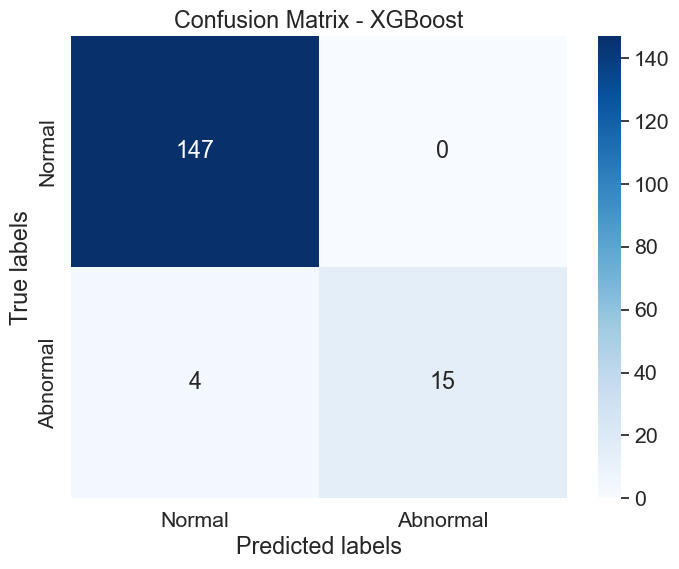

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = r"C:\Users\Jay\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Create XGBoost ensemble model
xgb_model = XGBClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Hyperparameter tuning using GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit=True, verbose=3)
grid.fit(
    np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1),
    y_train
)

# Get the best parameters from the grid search
best_params = grid.best_params_

# Train the XGBoost model with the best parameters
xgb_model_best = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42
)

# Reshape data for XGBoost input (samples, features)
X_train_xgb = np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
X_test_xgb = np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)

# Train the XGBoost model with the best parameters
xgb_model_best.fit(X_train_xgb, y_train)

# Make predictions on training data
train_predictions_xgb = xgb_model_best.predict(X_train_xgb)

# Make predictions on test data
test_predictions_xgb = xgb_model_best.predict(X_test_xgb)

# Evaluate the XGBoost model on training data
train_accuracy_xgb = accuracy_score(y_train, train_predictions_xgb)

# Evaluate the XGBoost model on test data
test_accuracy_xgb = accuracy_score(y_test, test_predictions_xgb)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on training data (XGBoost): {train_accuracy_xgb * 100:.2f}%")
print(f"Accuracy on test data (XGBoost): {test_accuracy_xgb * 100:.2f}%")

# Compute confusion matrix for test data
conf_matrix = confusion_matrix(y_test, test_predictions_xgb)

# Define labels for the matrix
labels = ['Normal', 'Abnormal']

# Create heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoost')

# Show plot
plt.show()


# Adaboost

with hyperparameter tuning using GridSearchCV for both the base Decision Tree and the AdaBoost classifier.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = r"C:\Users\Jaber\OneDrive - University of Florida\Educational\Research\MLFHRT\FHR-dataset-CTUUHB\combined_FHR_data_resampled_with_minutes.csv"
df = pd.read_csv(data_path)

# Convert labels to binary (1 or 2 to 0 or 1)
df['label'] = df['label'].apply(lambda x: 0 if x == 1 else 1)

# Treat missing values with mean strategy
df.fillna(df.mean(), inplace=True)

# Extract features (FHR time series) and labels
X_time_series = df.iloc[:, 1:-15].values  # Exclude the last 15 columns
X_additional_features = df[['Age', 'Gravidity', 'Sex', 'Parity', 'Hypertension', 'Diabetes', 'Preeclampsia',
                             'Liq. praecox', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
                             'NoProgress', 'II.stage']].values

y = df['label'].values  # Include the target variable y

# Split the dataset into train and test sets
X_train_time_series, X_test_time_series, X_train_additional, X_test_additional, y_train, y_test = train_test_split(
    X_time_series, X_additional_features, y, test_size=0.3, random_state=42
)

# Standardize the features (mean=0, std=1)
scaler_time_series = StandardScaler()
X_train_time_series = scaler_time_series.fit_transform(X_train_time_series)
X_test_time_series = scaler_time_series.transform(X_test_time_series)

scaler_additional = StandardScaler()
X_train_additional = scaler_additional.fit_transform(X_train_additional)
X_test_additional = scaler_additional.transform(X_test_additional)

# Create a weak learner (base estimator)
base_estimator = DecisionTreeClassifier()

# Define parameter grid for base Decision Tree
param_grid_dt = {
    'max_depth': [1, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best parameters for base Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(
    np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1),
    y_train
)

# Get the best parameters for the base Decision Tree
best_params_dt = grid_dt.best_params_

# Create AdaBoost classifier with the tuned Decision Tree as the base estimator
adaboost_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(**best_params_dt),
    n_estimators=50,
    learning_rate=1.0
)

# Train the AdaBoost model
adaboost_model.fit(
    np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1),
    y_train
)

# Make predictions on training data
train_predictions_adaboost = adaboost_model.predict(
    np.concatenate([X_train_time_series.reshape(X_train_time_series.shape[0], -1), X_train_additional], axis=1)
)

# Make predictions on test data
test_predictions_adaboost = adaboost_model.predict(
    np.concatenate([X_test_time_series.reshape(X_test_time_series.shape[0], -1), X_test_additional], axis=1)
)

# Evaluate the AdaBoost model on training data
train_accuracy_adaboost = accuracy_score(y_train, train_predictions_adaboost)

# Evaluate the AdaBoost model on test data
test_accuracy_adaboost = accuracy_score(y_test, test_predictions_adaboost)

print(f"Best Parameters for Decision Tree: {best_params_dt}")
print(f"Accuracy on training data (AdaBoost): {train_accuracy_adaboost * 100:.2f}%")
print(f"Accuracy on test data (AdaBoost): {test_accuracy_adaboost * 100:.2f}%")


Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy on training data (AdaBoost): 100.00%
Accuracy on test data (AdaBoost): 95.78%
